# Word Search II

Given an m x n board of characters and a list of strings words, return all words on the board.

Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

 

**Example 1:**

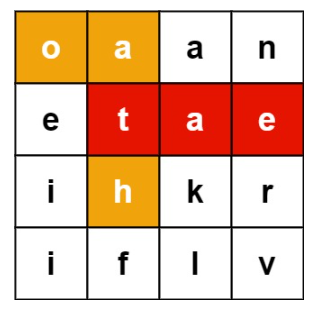


Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
Output: ["eat","oath"]

**Example 2:**

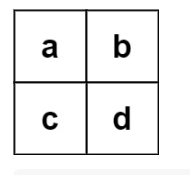

Input: board = [["a","b"],["c","d"]], words = ["abcb"]
Output: []
 

**Constraints:**

m == board.length
n == board[i].length
1 <= m, n <= 12
board[i][j] is a lowercase English letter.
1 <= words.length <= 3 * 104
1 <= words[i].length <= 10
words[i] consists of lowercase English letters.
All the strings of words are unique.

In [1]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_word = False
        
class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        current = self.root
        for char in word:
            if char not in current.children:
                current.children[char] = TrieNode()
            current = current.children[char]
        current.is_word = True

class Solution:
    def findWords(self, board, words):
        trie = Trie()
        for word in words:
            trie.insert(word)
        result = set()
        for i in range(len(board)):
            for j in range(len(board[0])):
                self.dfs(board, i, j, trie.root, "", result)
        return list(result)

    def dfs(self, board, i, j, node, word, result):
        if node.is_word:
            result.add(word)
            node.is_word = False
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]):
            return
        char = board[i][j]
        if char not in node.children:
            return
        board[i][j] = None
        self.dfs(board, i + 1, j, node.children[char], word + char, result)
        self.dfs(board, i - 1, j, node.children[char], word + char, result)
        self.dfs(board, i, j + 1, node.children[char], word + char, result)
        self.dfs(board, i, j - 1, node.children[char], word + char, result)
        board[i][j] = char

In [2]:
board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]]
words = ["oath","pea","eat","rain"]

solver = Solution()
print(solver.findWords(board, words)) # Output: ["eat","oath"]

board = [["a","b"],["c","d"]]
words = ["abcb"]

print(solver.findWords(board, words)) # Output: []

['eat', 'oath']
[]
